In [205]:
import pandas as pd

# Read the cleaned dataset
df = pd.read_csv('../data/cleaned_df.csv')
df.head()

,user_id,order_id,correct,answer_type,attempt_count,sequence_id,skill_name,hint_count,overlap_time
0,77912,20223948,1.0,algebra,1,2655,Effect of Changing Dimensions of a Shape Prpor...,0,95637
1,77912,20223955,1.0,choose_1,1,2655,Effect of Changing Dimensions of a Shape Prpor...,0,227226
2,77912,20223963,1.0,choose_1,1,2655,Effect of Changing Dimensions of a Shape Prpor...,0,165891
3,77912,20223971,1.0,choose_1,1,2655,Effect of Changing Dimensions of a Shape Prpor...,0,129112
4,77912,20223984,1.0,choose_1,1,2655,"Addition Whole Numbers,",0,87127


In [206]:
# Now sort by user_id and order_id
df = df.sort_values(['user_id', 'order_id'])
df.head()

,user_id,order_id,correct,answer_type,attempt_count,sequence_id,skill_name,hint_count,overlap_time
454704,26787,34955672,1.0,algebra,1,11069,Addition and Subtraction Integers,0,12044
454705,26787,34955681,1.0,algebra,1,11069,Addition and Subtraction Integers,0,3728
454706,26787,34955693,1.0,algebra,1,11069,Addition and Subtraction Integers,0,4241
454707,26787,34955702,1.0,algebra,1,11069,Addition and Subtraction Integers,0,4161
454708,26787,34955716,1.0,algebra,1,11069,Addition and Subtraction Integers,0,7674


In [207]:
# One-hot encode 'skill_name' column, handling multiple skills separated by ','
from sklearn.preprocessing import MultiLabelBinarizer

# Split skill_name by ',' and strip whitespace, remove empty strings
def clean_skill_list(skill_str):
    if pd.isnull(skill_str):
        return []
    return [s.strip() for s in skill_str.split(',') if s.strip() != '']

df['skill_name_split'] = df['skill_name'].apply(clean_skill_list)

# # One-hot encode using MultiLabelBinarizer
# mlb = MultiLabelBinarizer()
# skill_ohe = pd.DataFrame(mlb.fit_transform(df['skill_name_split']), columns=mlb.classes_, index=df.index)

# # Concatenate one-hot encoded skills to the original DataFrame
# df = pd.concat([df, skill_ohe], axis=1)

# Drop the temporary split column if not needed
# df = df.drop(columns=['skill_name_split'])

# Now 'df' contains one-hot encoded skill columns
df.head()

,user_id,order_id,correct,answer_type,attempt_count,sequence_id,skill_name,hint_count,overlap_time,skill_name_split
454704,26787,34955672,1.0,algebra,1,11069,Addition and Subtraction Integers,0,12044,[Addition and Subtraction Integers]
454705,26787,34955681,1.0,algebra,1,11069,Addition and Subtraction Integers,0,3728,[Addition and Subtraction Integers]
454706,26787,34955693,1.0,algebra,1,11069,Addition and Subtraction Integers,0,4241,[Addition and Subtraction Integers]
454707,26787,34955702,1.0,algebra,1,11069,Addition and Subtraction Integers,0,4161,[Addition and Subtraction Integers]
454708,26787,34955716,1.0,algebra,1,11069,Addition and Subtraction Integers,0,7674,[Addition and Subtraction Integers]


In [208]:
# One-hot encode the 'answer_type' column for df, outputting 1/0 (default for get_dummies)
answer_type_ohe = pd.get_dummies(df['answer_type'], prefix='answer_type', dtype=int)

# Concatenate the one-hot encoded columns to df
df = pd.concat([df, answer_type_ohe], axis=1)

df.head()

,user_id,order_id,correct,answer_type,attempt_count,sequence_id,skill_name,hint_count,overlap_time,skill_name_split,answer_type_algebra,answer_type_choose_1,answer_type_fill_in_1
454704,26787,34955672,1.0,algebra,1,11069,Addition and Subtraction Integers,0,12044,[Addition and Subtraction Integers],1,0,0
454705,26787,34955681,1.0,algebra,1,11069,Addition and Subtraction Integers,0,3728,[Addition and Subtraction Integers],1,0,0
454706,26787,34955693,1.0,algebra,1,11069,Addition and Subtraction Integers,0,4241,[Addition and Subtraction Integers],1,0,0
454707,26787,34955702,1.0,algebra,1,11069,Addition and Subtraction Integers,0,4161,[Addition and Subtraction Integers],1,0,0
454708,26787,34955716,1.0,algebra,1,11069,Addition and Subtraction Integers,0,7674,[Addition and Subtraction Integers],1,0,0


In [209]:
# Drop 'skill_name' and 'answer_type' columns from df
df = df.drop(columns=['sequence_id'])
df.head()

,user_id,order_id,correct,answer_type,attempt_count,skill_name,hint_count,overlap_time,skill_name_split,answer_type_algebra,answer_type_choose_1,answer_type_fill_in_1
454704,26787,34955672,1.0,algebra,1,Addition and Subtraction Integers,0,12044,[Addition and Subtraction Integers],1,0,0
454705,26787,34955681,1.0,algebra,1,Addition and Subtraction Integers,0,3728,[Addition and Subtraction Integers],1,0,0
454706,26787,34955693,1.0,algebra,1,Addition and Subtraction Integers,0,4241,[Addition and Subtraction Integers],1,0,0
454707,26787,34955702,1.0,algebra,1,Addition and Subtraction Integers,0,4161,[Addition and Subtraction Integers],1,0,0
454708,26787,34955716,1.0,algebra,1,Addition and Subtraction Integers,0,7674,[Addition and Subtraction Integers],1,0,0


In [210]:
from sklearn.preprocessing import MinMaxScaler

# Scale 'overlap_time', 'hint_count', and 'attempt_count' in df using MinMaxScaler
scaler = MinMaxScaler()
for col in ['overlap_time', 'hint_count', 'attempt_count']:
    if col in df.columns:
        df[col] = scaler.fit_transform(df[[col]])

df[['overlap_time', 'hint_count', 'attempt_count']].head()

,overlap_time,hint_count,attempt_count
454704,0.003549,0.0,0.000419
454705,0.003539,0.0,0.000419
454706,0.003540,0.0,0.000419
454707,0.003540,0.0,0.000419
454708,0.003544,0.0,0.000419


Prepare Sequences

In [215]:
# 1. Get all unique skills from all arrays in 'skill_name_split'
all_skills = sorted({skill for skills in df['skill_name_split'] for skill in skills})
skill2id = {skill: idx for idx, skill in enumerate(all_skills)}

# 2. Map each skill array to an array of skill_ids
df['skill_ids'] = df['skill_name_split'].apply(lambda skills: [skill2id[s] for s in skills if s in skill2id])

num_skills = len(all_skills)
print(f"Number of unique skills: {num_skills}")

# 3. Create question_type_id
df['question_type_id'] = pd.Categorical(df['answer_type']).codes
num_question_types = df['question_type_id'].nunique()
print(f"Number of unique question types: {num_question_types}")

# 4. Show the head of (skill_ids, skill_name_split, question_type_id, answer_type) pairings
print(df[['skill_ids', 'skill_name_split', 'question_type_id', 'answer_type']].tail(10))

Number of unique skills: 174
Number of unique question types: 3
         skill_ids                                   skill_name_split  \
540739        [65]                                      [Graph Shape]   
540740        [65]                                      [Graph Shape]   
540741  [152, 158]                                 [Table, Unit Rate]   
540742  [152, 158]                                 [Table, Unit Rate]   
540743         [7]                [Addition and Subtraction Integers]   
540744         [7]                [Addition and Subtraction Integers]   
540745      [7, 6]  [Addition and Subtraction Integers, Addition a...   
540746      [7, 8]  [Addition and Subtraction Integers, Addition a...   
540747      [7, 8]  [Addition and Subtraction Integers, Addition a...   
540748      [7, 6]  [Addition and Subtraction Integers, Addition a...   

        question_type_id answer_type  
540739                 0     algebra  
540740                 0     algebra  
540741         

In [216]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

def prepare_dkt_sequences(df, num_skills=num_skills, max_seq_len=None, 
                          extra_features_cols=['attempt_count', 'hint_count', 'overlap_time']):
    """
    Prepares student interaction sequences for DKT-style LSTM input.
    Handles multiple skills per sample by encoding each skill separately.
    """
    input_seqs = []
    output_seqs = []
    extras = []

    grouped = df.sort_values('order_id').groupby('user_id')

    for _, group in grouped:
        x_seq = []
        y_seq = []

        skill_ids_list = group['skill_ids'].values  # Each is a list of skill ids
        corrects = group['correct'].values
        question_types = group['question_type_id'].values

        for i in range(len(skill_ids_list) - 1):
            skills = skill_ids_list[i]
            correct = int(corrects[i])
            qtype = question_types[i]
            next_skills = skill_ids_list[i+1]
            next_correct = corrects[i+1]

            # Encode each skill in the current step
            for skill in skills:
                x_encoded = skill + correct * num_skills + qtype * num_skills * 2
                x_seq.append(x_encoded)

            # Target: one-hot for each next_skill, value is next_correct
            y_vec = np.zeros(num_skills)
            for next_skill in next_skills:
                if isinstance(next_skill, (int, np.integer)) and 0 <= next_skill < num_skills:
                    y_vec[int(next_skill)] = next_correct
            y_seq.append(y_vec)

        if len(x_seq) > 0:
            input_seqs.append(x_seq)
            output_seqs.append(y_seq)
            if extra_features_cols:
                extras.append(group[extra_features_cols].iloc[1:].values.tolist())

    # Pad all sequences
    X_input = pad_sequences(input_seqs, padding='post', maxlen=max_seq_len)
    Y_output = pad_sequences(output_seqs, padding='post', maxlen=max_seq_len, dtype='float32')

    # Handle extra features
    extra_inputs = None
    if extra_features_cols:
        extra_inputs = pad_sequences(extras, padding='post', maxlen=max_seq_len, dtype='float32')

    # Print encoding distribution for debug
    import collections
    all_encodings = [enc for seq in input_seqs for enc in seq]
    encoding_counts = collections.Counter(all_encodings)
    print(f"\nTop 20 most common input encodings (skill+correct+qtype):")
    for k, v in encoding_counts.most_common(20):
        print(f"Encoding {k}: {v} times")
    print(f"\nLeast 20 input encodings (skill+correct+qtype):")
    for k, v in encoding_counts.most_common()[-20:]:
        print(f"Encoding {k}: {v} times")
    print(f"Total unique input encodings: {len(encoding_counts)}")

    return X_input, Y_output, extra_inputs

In [265]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, TimeDistributed
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

def build_dkt_model(num_skills=num_skills, num_extra_features=3, num_question_types=3, embedding_dim=32, lstm_units=80, use_bilstm=True, dropout_rate=0.3, learning_rate=0.001):
    num_total_inputs = num_skills * 2 * num_question_types

    # Inputs
    skill_input = Input(shape=(None,), name='skill_input')
    extra_input = Input(shape=(None, num_extra_features), name='extra_input')

    # Embedding
    skill_embed = Embedding(input_dim=num_total_inputs, output_dim=embedding_dim, name='skill_embedding')(skill_input)

    # Combine
    merged_input = Concatenate(name='concat_inputs')([skill_embed, extra_input])
    merged_input = Dropout(dropout_rate)(merged_input)  # Dropout after concat

    # LSTM or BiLSTM with dropout
    if use_bilstm:
        lstm_out = Bidirectional(LSTM(units=lstm_units, return_sequences=True, dropout=dropout_rate), name='bilstm_layer')(merged_input)
    else:
        lstm_out = LSTM(units=lstm_units, return_sequences=True, dropout=dropout_rate, name='lstm_layer')(merged_input)

    # Output: predict correctness for all skills
    predictions = TimeDistributed(Dense(num_skills, activation='sigmoid'), name='predictions')(lstm_out)

    optimizer = Adam(learning_rate=learning_rate)

    model = Model(inputs=[skill_input, extra_input], outputs=predictions)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['AUC'])

    return model

from tensorflow.keras.callbacks import EarlyStopping

def train_dkt_model(model, X_input, Y_output, extras, epochs=10, batch_size=32):
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(
        x={'skill_input': X_input, 'extra_input': extras},
        y=Y_output,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.2,
        callbacks=[early_stop]
    )
    return history



In [218]:
X, y, extras = prepare_dkt_sequences(df, max_seq_len=30)


Top 20 most common input encodings (skill+correct+qtype):
Encoding 181: 11219 times
Encoding 260: 9131 times
Encoding 624: 8087 times
Encoding 587: 7909 times
Encoding 630: 7434 times
Encoding 618: 7079 times
Encoding 466: 7002 times
Encoding 631: 6236 times
Encoding 674: 5958 times
Encoding 145: 5773 times
Encoding 641: 5740 times
Encoding 640: 5644 times
Encoding 413: 5517 times
Encoding 276: 5384 times
Encoding 877: 5210 times
Encoding 635: 5175 times
Encoding 972: 5164 times
Encoding 529: 4929 times
Encoding 988: 4919 times
Encoding 113: 4862 times

Least 20 input encodings (skill+correct+qtype):
Encoding 117: 3 times
Encoding 205: 3 times
Encoding 262: 3 times
Encoding 374: 3 times
Encoding 818: 3 times
Encoding 168: 3 times
Encoding 786: 2 times
Encoding 110: 2 times
Encoding 26: 2 times
Encoding 137: 1 times
Encoding 172: 1 times
Encoding 1031: 1 times
Encoding 807: 1 times
Encoding 284: 1 times
Encoding 806: 1 times
Encoding 277: 1 times
Encoding 548: 1 times
Encoding 103: 1 t

In [184]:
X.shape

(6806, 30)

In [214]:
y.shape

(6806, 30, 174)

In [186]:
extras.shape

(6806, 30, 3)

In [219]:
from sklearn.model_selection import train_test_split

# Split into train and validation sets (80/20 split)
X_train, X_val, y_train, y_val, extras_train, extras_val = train_test_split(
    X, y, extras, test_size=0.2, random_state=42
)

print(f"Train shapes: X={X_train.shape}, y={y_train.shape}, extras={extras_train.shape}")
print(f"Validation shapes: X={X_val.shape}, y={y_val.shape}, extras={extras_val.shape}")


Train shapes: X=(5444, 30), y=(5444, 30, 174), extras=(5444, 30, 3)
Validation shapes: X=(1362, 30), y=(1362, 30, 174), extras=(1362, 30, 3)


In [248]:
from itertools import product

embedding_dims = [64, 128]
lstm_units_list =  [64, 128, 256]
bilstm_options = [True, False]
batch_sizes = [16, 32]
results = []

for emb_dim, lstm_units, use_bilstm, batch_size in product(embedding_dims, lstm_units_list, bilstm_options, batch_sizes):
    print(f"\nTraining with embedding_dim={emb_dim}, lstm_units={lstm_units}, use_bilstm={use_bilstm}, batch_size={batch_size}")
    model = build_dkt_model(
        num_skills=num_skills,
        num_extra_features=3,
        num_question_types=num_question_types,
        embedding_dim=emb_dim,
        lstm_units=lstm_units,
        use_bilstm=use_bilstm
    )
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(
        x={'skill_input': X_train, 'extra_input': extras_train},
        y=y_train,
        batch_size=batch_size,
        epochs=3,  # Use fewer epochs for grid search speed
        validation_data=({'skill_input': X_val, 'extra_input': extras_val}, y_val),
        callbacks=[early_stop],
        verbose=0
    )
    best_val_auc = max(history.history['val_AUC'])
    print(f"Best val_AUC: {best_val_auc:.4f}")
    results.append({
        'embedding_dim': emb_dim,
        'lstm_units': lstm_units,
        'use_bilstm': use_bilstm,
        'batch_size': batch_size,
        'best_val_auc': best_val_auc
    })

# Show sorted results
results = sorted(results, key=lambda x: x['best_val_auc'], reverse=True)
print("\nTop grid search results:")
for r in results[:8]:
    print(r)


Training with embedding_dim=64, lstm_units=64, use_bilstm=True, batch_size=16
Best val_AUC: 0.7290

Training with embedding_dim=64, lstm_units=64, use_bilstm=True, batch_size=32
Best val_AUC: 0.7097

Training with embedding_dim=64, lstm_units=64, use_bilstm=False, batch_size=16
Best val_AUC: 0.7533

Training with embedding_dim=64, lstm_units=64, use_bilstm=False, batch_size=32
Best val_AUC: 0.7187

Training with embedding_dim=64, lstm_units=128, use_bilstm=True, batch_size=16
Best val_AUC: 0.8046

Training with embedding_dim=64, lstm_units=128, use_bilstm=True, batch_size=32
Best val_AUC: 0.6950

Training with embedding_dim=64, lstm_units=128, use_bilstm=False, batch_size=16
Best val_AUC: 0.7276

Training with embedding_dim=64, lstm_units=128, use_bilstm=False, batch_size=32
Best val_AUC: 0.7149

Training with embedding_dim=64, lstm_units=256, use_bilstm=True, batch_size=16
Best val_AUC: 0.7979

Training with embedding_dim=64, lstm_units=256, use_bilstm=True, batch_size=32
Best val_AU

Main student agent

In [272]:
model = build_dkt_model(embedding_dim=64, lstm_units=128, use_bilstm=True, learning_rate=0.002)
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, min_delta=0.0001)
history = model.fit(
    x={'skill_input': X_train, 'extra_input': extras_train},
    y=y_train,
    batch_size=16,
    epochs=25, 
    validation_data=({'skill_input': X_val, 'extra_input': extras_val}, y_val),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/25
341/341 ━━━━━━━━━━━━━━━━━━━━ 74s 195ms/step - AUC: 0.6023 - loss: 0.1025 - val_AUC: 0.6943 - val_loss: 0.0200
Epoch 2/25
341/341 ━━━━━━━━━━━━━━━━━━━━ 122s 358ms/step - AUC: 0.7165 - loss: 0.0197 - val_AUC: 0.7568 - val_loss: 0.0186
Epoch 3/25
341/341 ━━━━━━━━━━━━━━━━━━━━ 129s 379ms/step - AUC: 0.7691 - loss: 0.0183 - val_AUC: 0.7986 - val_loss: 0.0177
Epoch 4/25
341/341 ━━━━━━━━━━━━━━━━━━━━ 120s 352ms/step - AUC: 0.8010 - loss: 0.0177 - val_AUC: 0.8315 - val_loss: 0.0166
Epoch 5/25
341/341 ━━━━━━━━━━━━━━━━━━━━ 137s 403ms/step - AUC: 0.8375 - loss: 0.0165 - val_AUC: 0.8764 - val_loss: 0.0150
Epoch 6/25
341/341 ━━━━━━━━━━━━━━━━━━━━ 124s 363ms/step - AUC: 0.8716 - loss: 0.0150 - val_AUC: 0.9042 - val_loss: 0.0138
Epoch 7/25
341/341 ━━━━━━━━━━━━━━━━━━━━ 137s 402ms/step - AUC: 0.8942 - loss: 0.0140 - val_AUC: 0.9178 - val_loss: 0.0127
Epoch 8/25
341/341 ━━━━━━━━━━━━━━━━━━━━ 75s 204ms/step - AUC: 0.9126 - loss: 0.0130 - val_AUC: 0.9261 - val_loss: 0.0120
Epoch 9/25
341/341 ━━━━━━━

In [266]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("Loss over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Binary Crossentropy")
    plt.legend()

    # AUC
    plt.subplot(1, 2, 2)
    plt.plot(history.history['AUC'], label='Train AUC')
    plt.plot(history.history['val_AUC'], label='Val AUC')
    plt.title("AUC over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.legend()

    plt.tight_layout()
    plt.show()


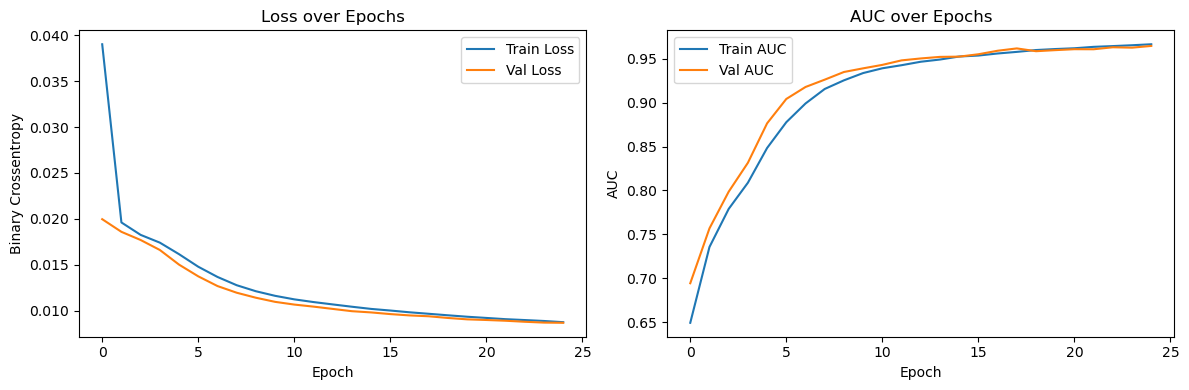

In [273]:
plot_history(history)

In [ ]:
save_dir = '../models'
model.save(f'{save_dir}/dkt_model.keras')  # Recommended Keras format

FileNotFoundError: [Errno 2] No such file or directory: './models/dkt_model.keras'